<strong>Import libraries and connect database</strong>

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_colwidth', None)

conn = sqlite3.connect("travel.sqlite")

<h3>Task 1: Utilize the flights table to analyze historical flight data, including scheduled departure and arrival times, actual departure and arrival times, and flight airports.</h3>


<strong>Explore table and create dataframe to work</strong>

<h1>Airlines Data Analysis</h1>
<img src="https://images.unsplash.com/photo-1486556813609-9a827fdc306f?q=80&w=2069&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Alt Text" width="1920" height='600'/>


<strong>About dataset</strong>

The dataset used for this data analytics project was obtained from Kaggle.
Link: https://www.kaggle.com/datasets/saadharoon27/airlines-dataset/data

Tables in this dataset:

1. aircrafts_data
2. airports_data
3. boarding_passes
4. bookings
5. flights
6. seats
7. ticket_flights
8. tickets

In [3]:
q1 = '''
SELECT * from flights


'''
data = pd.read_sql_query(q1, conn)

<strong>Clean and transform data types </strong>

In [4]:

#Data cleaning: Remove the "+03" from the string
data['actual_departure'] = data['actual_departure'].str.replace('\+03', '', regex=True)
data['scheduled_departure'] = data['scheduled_departure'].str.replace('\+03', '', regex=True)
data['actual_arrival'] = data['actual_arrival'].str.replace('\+03', '', regex=True)
data['scheduled_arrival'] = data['scheduled_arrival'].str.replace('\+03', '', regex=True)

#Data cleaning: Replace the "/N" from the fields with null values. So, lets use the .replace() method, not .str.replace().
data['actual_departure'] = data['actual_departure'].replace(r'\\N', pd.NA, regex=True)
data['actual_arrival'] = data['actual_arrival'].replace(r'\\N', pd.NA, regex=True)


# Convert date strings to datetime format to perform operations
data['scheduled_departure'] = pd.to_datetime(data['scheduled_departure'])
data['scheduled_arrival'] = pd.to_datetime(data['scheduled_arrival'])

data['actual_departure'] = pd.to_datetime(data['actual_departure'])
data['actual_arrival'] = pd.to_datetime(data['actual_arrival'])

print(data)

       flight_id flight_no scheduled_departure   scheduled_arrival  \
0           1185    PG0134 2017-09-10 09:50:00 2017-09-10 14:55:00   
1           3979    PG0052 2017-08-25 14:50:00 2017-08-25 17:35:00   
2           4739    PG0561 2017-09-05 12:30:00 2017-09-05 14:15:00   
3           5502    PG0529 2017-09-12 09:50:00 2017-09-12 11:20:00   
4           6938    PG0461 2017-09-04 12:25:00 2017-09-04 13:20:00   
...          ...       ...                 ...                 ...   
33116      33117    PG0063 2017-08-02 19:25:00 2017-08-02 20:10:00   
33117      33118    PG0063 2017-07-28 19:25:00 2017-07-28 20:10:00   
33118      33119    PG0063 2017-09-08 19:25:00 2017-09-08 20:10:00   
33119      33120    PG0063 2017-08-01 19:25:00 2017-08-01 20:10:00   
33120      33121    PG0063 2017-08-26 19:25:00 2017-08-26 20:10:00   

      departure_airport arrival_airport     status aircraft_code  \
0                   DME             BTK  Scheduled           319   
1                   VKO

<strong>Create delay columns to analyze times</strong>

In [5]:

#Creating new columns and retrieving just the minutes using "dt.total_seconds()".
data['departure_delay'] = (data['actual_departure'] - data['scheduled_departure']).dt.total_seconds() / 60
data['arrival_delay'] = (data['actual_arrival'] - data['scheduled_arrival']).dt.total_seconds() / 60

print(data)
print(data['departure_delay'].describe())
print(data['arrival_delay'].describe())

       flight_id flight_no scheduled_departure   scheduled_arrival  \
0           1185    PG0134 2017-09-10 09:50:00 2017-09-10 14:55:00   
1           3979    PG0052 2017-08-25 14:50:00 2017-08-25 17:35:00   
2           4739    PG0561 2017-09-05 12:30:00 2017-09-05 14:15:00   
3           5502    PG0529 2017-09-12 09:50:00 2017-09-12 11:20:00   
4           6938    PG0461 2017-09-04 12:25:00 2017-09-04 13:20:00   
...          ...       ...                 ...                 ...   
33116      33117    PG0063 2017-08-02 19:25:00 2017-08-02 20:10:00   
33117      33118    PG0063 2017-07-28 19:25:00 2017-07-28 20:10:00   
33118      33119    PG0063 2017-09-08 19:25:00 2017-09-08 20:10:00   
33119      33120    PG0063 2017-08-01 19:25:00 2017-08-01 20:10:00   
33120      33121    PG0063 2017-08-26 19:25:00 2017-08-26 20:10:00   

      departure_airport arrival_airport     status aircraft_code  \
0                   DME             BTK  Scheduled           319   
1                   VKO

<strong>Plot the delay columns</strong>

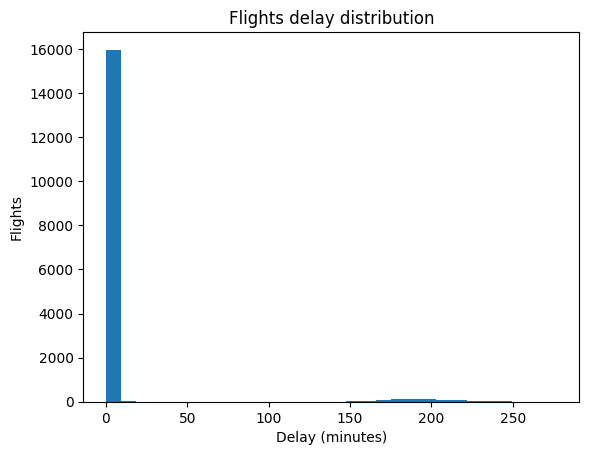

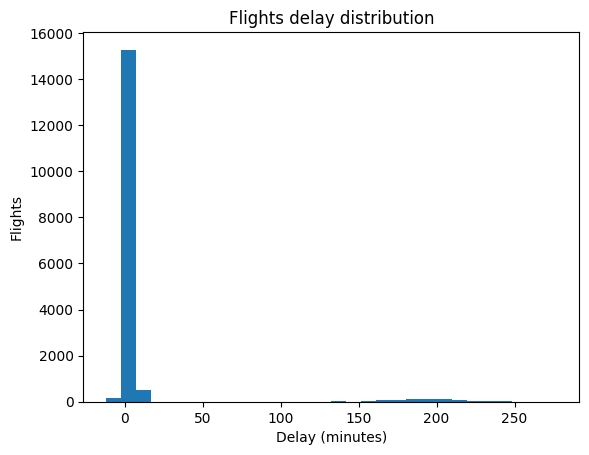

In [6]:
plt.hist(data['departure_delay'], bins= 30)
plt.title('Flights delay distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Flights')
plt.show()

plt.hist(data['arrival_delay'], bins= 30)
plt.title('Flights delay distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Flights')
plt.show()

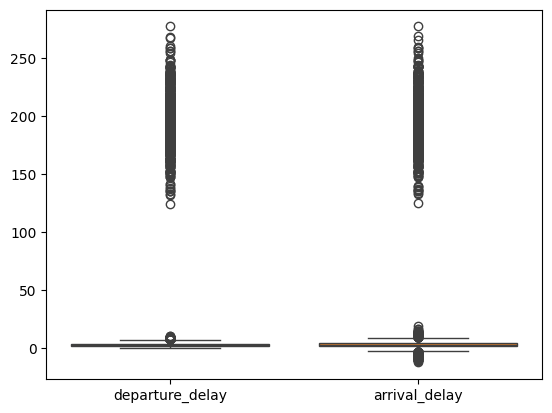

In [7]:
sns.boxplot([data['departure_delay'], data['arrival_delay']])
plt.show()

Distribution looks similar for both (departure_delay and arrival_delay) so there should be a strong correlation between these variables. Lets confirm that and check the percentage of outlier values.

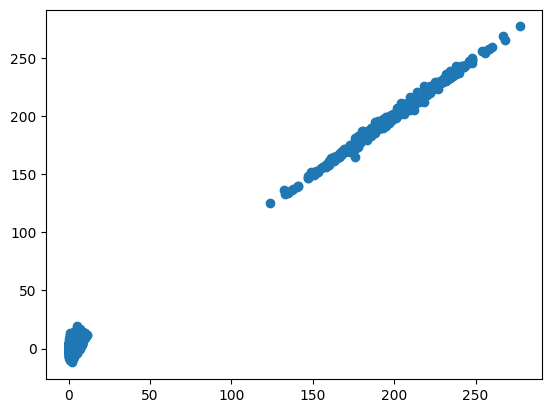

Spearman rank correlation coefficient: 0.968
P-value: 0.000
There is a statistically significant correlation.

Values beyond 1.5 times the IQR: 949
That is 6.12% of the data
Values within the bounds: 15500 Range: 0.0 to 6.0


In [8]:
plt.scatter(data['departure_delay'], data['arrival_delay'])
plt.show()

from scipy.stats.mstats import spearmanr

# Calculate Spearman rank correlation coefficient and p-value since data is not normally distributed.
correlation, p_value = spearmanr(data['departure_delay'], data['arrival_delay'])

# Display the results
print(f"Spearman rank correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")

# Calculate the first quartile (Q1)
Q1 = data['departure_delay'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = data['departure_delay'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR #-1
upper_bound = Q3 + 1.5 * IQR #7
 
# Retrieve values beyond the bounds
outliers = data[(data['departure_delay'] < lower_bound) | (data['departure_delay'] > upper_bound)]['departure_delay'].tolist()
non_outliers = data[(data['departure_delay'] > lower_bound) & (data['departure_delay'] < upper_bound)]['departure_delay'].tolist()

# Print or use the 'outliers' list as needed
print("\nValues beyond 1.5 times the IQR:", len(outliers))
print('That is ' + str(round(len(outliers)/len(non_outliers)*100, 2)) + '% of the data')
print('Values within the bounds:', len(non_outliers), 'Range: ' + str(min(non_outliers)) + ' to ' + str(max(non_outliers)))

Very strong correlation as expected. Arrival_delay is very likely to occur because of a delayed departure. Therefore, from now, we will omit arrival_delay.
On the other hand, 5.66% of the data are outliers. Most common delays are from 0 to 6 minutes.

<strong>Check for patterns in delays: day of the week or route.</strong>

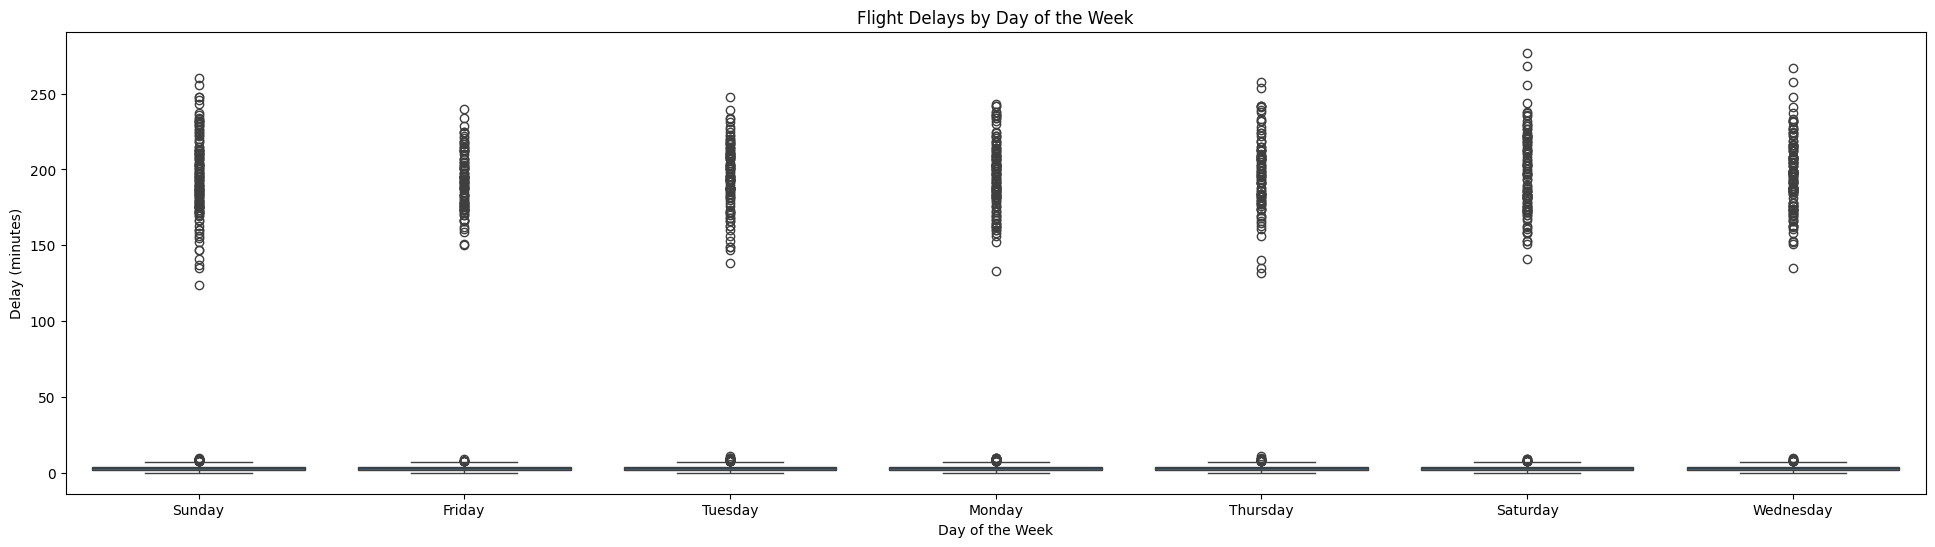

In [9]:
# Explore delays by day of the week. Create new column for days.
data['day_of_week'] = data['scheduled_departure'].dt.day_name()
plt.figure(figsize=(24, 6))
sns.boxplot(x='day_of_week', y=(data['actual_departure'] - data['scheduled_departure']).dt.total_seconds() / 60, data=data)
plt.title('Flight Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay (minutes)')
plt.show()



There are delay outliers regardless the day of the week. No significant difference across week days.

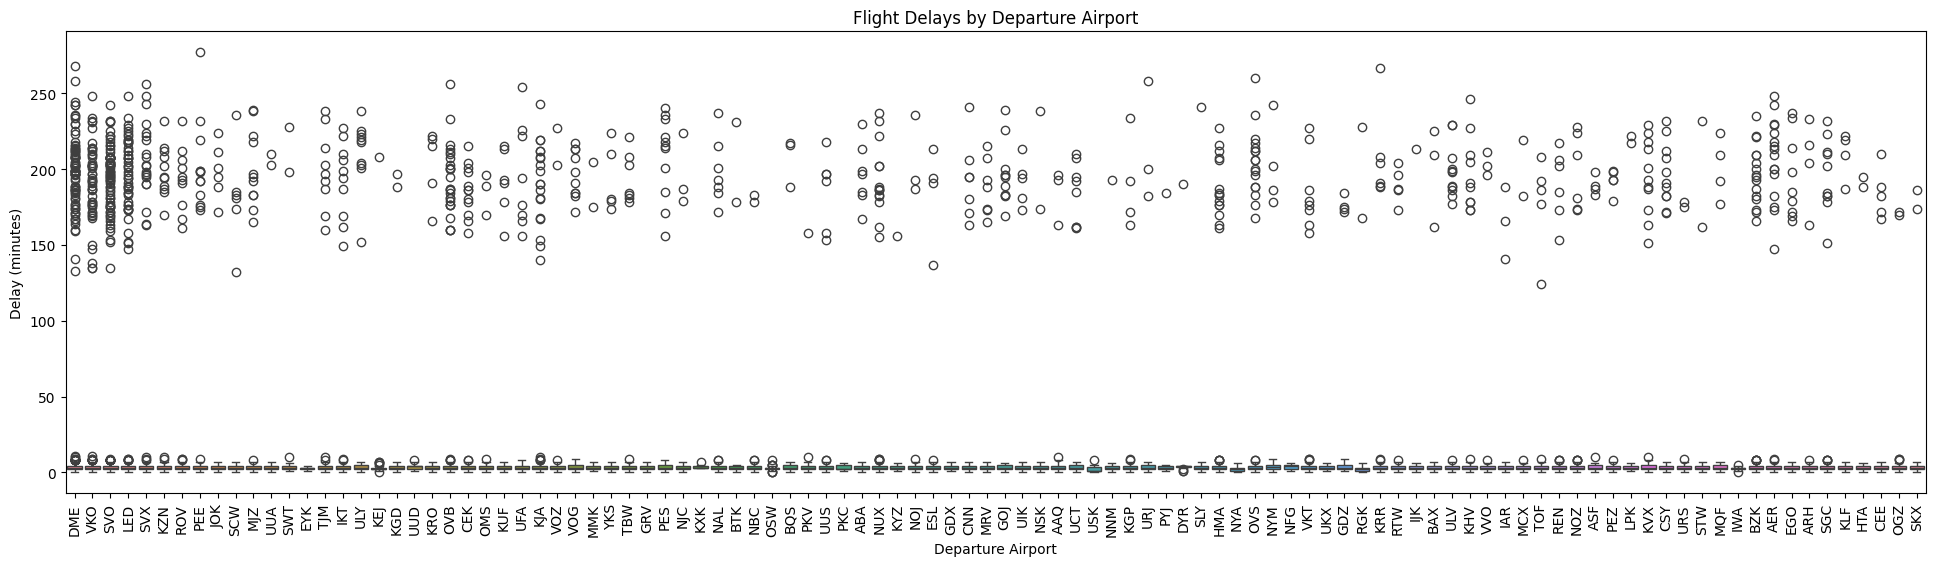

In [10]:
# Explore delays by departure airport.

# Create a boxplot
plt.figure(figsize=(24, 6))
sns.boxplot(x='departure_airport', y='departure_delay', data=data, hue='departure_airport')
plt.title('Flight Delays by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

<strong>Look for the most departure / arrival airports</strong>

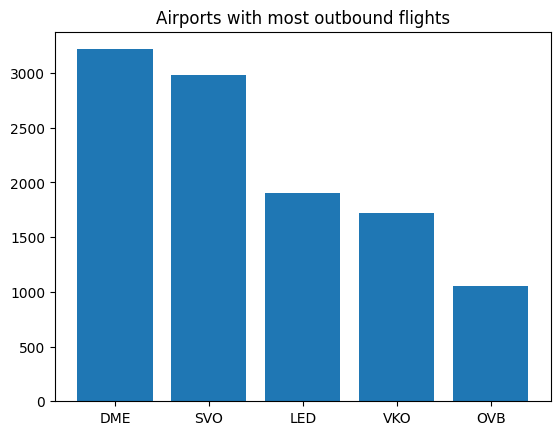

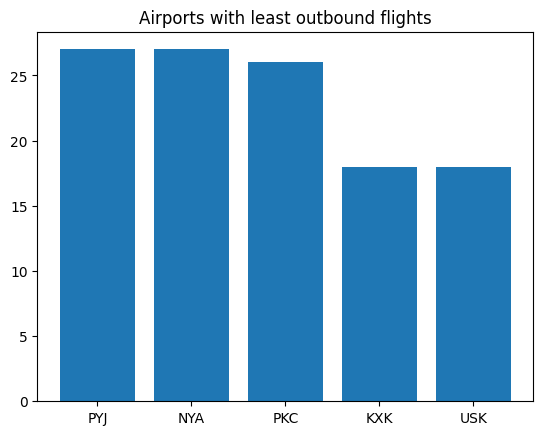

In [11]:
#Top most departure airports
airport_count = data['departure_airport'].value_counts().head()

plt.bar(airport_count.index, airport_count.values)
plt.title('Airports with most outbound flights')
plt.show()

airport_count2 = data['departure_airport'].value_counts().tail()

plt.bar(airport_count2.index, airport_count2.values)
plt.title('Airports with least outbound flights')
plt.show()

DME, SVO, LED, VKO airports have the most outbound flights of all airports analyzed. However, lets check the typical delays by flight route and if the number of outbound flight causes the delays or not.

<strong>Look for delays by flight route</strong>


In [12]:
data['flight_route'] = data['departure_airport'] +'-'+ data['arrival_airport']

#Create summary table to showcase the top 10 most common delay values for each flight route. In this case, we will use the median instead of mean since we confirmed that the data distribution does not fit into the normal distribution.
route_delays = data.groupby('flight_route').agg(delay=('departure_delay', 'median')).sort_values(by='delay', ascending=False).reset_index()
print(route_delays.head(10))
print(route_delays.tail(10))


#Create summary table to showcase the top 10 most common departure airport.
airport_delays = data.groupby('departure_airport').agg(delay=('departure_delay', 'median')).sort_values(by='delay', ascending=False).reset_index()
print(airport_delays.head(10))


#Lets find the airport names:
airportsdata = pd.read_sql_query('SELECT * FROM airports_data', conn)

mergeddata = pd.merge(airport_delays, airportsdata, left_on='departure_airport', right_on='airport_code')
mergeddata = mergeddata.drop(['airport_code', 'timezone'], axis=1)

print(mergeddata)

  flight_route  delay
0      VKO-DYR  109.0
1      PES-ROV    6.0
2      VKO-OSW    6.0
3      TOF-VOG    5.0
4      TOF-ARH    5.0
5      PKV-KZN    5.0
6      MCX-KZN    5.0
7      OVB-KLF    5.0
8      AER-KGP    4.5
9      KRR-NOZ    4.5
    flight_route  delay
608      SVX-IWA    2.0
609      PEE-OVB    2.0
610      ESL-GDZ    2.0
611      DME-GDZ    2.0
612      NYA-SVO    1.0
613      DME-DYR    1.0
614      USK-SVO    1.0
615      LED-PYJ    1.0
616      STW-RGK    1.0
617      USK-DME    1.0
  departure_airport  delay
0               NFG    4.0
1               DYR    4.0
2               UUD    4.0
3               NYM    3.5
4               SGC    3.0
5               SCW    3.0
6               RTW    3.0
7               ROV    3.0
8               REN    3.0
9               PYJ    3.0
    departure_airport  delay  \
0                 NFG    4.0   
1                 DYR    4.0   
2                 UUD    4.0   
3                 NYM    3.5   
4                 SGC    3.0   
..   

Based on the data, the flight route that would likely to occur is <strong>VKO-DYR</strong>. In addition, the airports with more delay likelihood are: <strong>NFG, DYR, UUD</strong> located in Nefteyugansk, Anadyr, Ulan-ude respectively.

<strong>Lets calculate the distance between airports</strong>

In [13]:
#Load the table
Ap_Fl = pd.read_sql_query('''SELECT flight_id, fa.airport_code AS FromAirportCode, fa.airport_name AS FromAirportName, fa.city AS FromCity, fa.coordinates AS FromCoordinates, 
ta.airport_code AS ToAirportCode, ta.airport_name AS ToAirportName, ta.city AS ToCity, ta.coordinates AS ToCoordinates FROM flights as fl
JOIN airports_data fa ON fl.departure_airport = fa.airport_code
JOIN airports_data ta ON fl.arrival_airport = ta.airport_code''', conn)

#Split Coordinates columns into two: Longitude and Latitude.
Ap_Fl['ToCoordinates'] = Ap_Fl['ToCoordinates'].str.strip('()')
Ap_Fl['FromCoordinates'] = Ap_Fl['FromCoordinates'].str.strip('()')
Ap_Fl[['From_longitude', 'From_Latitude']] = Ap_Fl.FromCoordinates.str.split(",", expand = True)
Ap_Fl[['To_longitude', 'To_Latitude']] = Ap_Fl.ToCoordinates.str.split(",", expand = True)

#Convert coordinates from string to float
Ap_Fl['From_longitude'] = pd.to_numeric(Ap_Fl['From_longitude'])
Ap_Fl['From_Latitude'] = pd.to_numeric(Ap_Fl['From_Latitude'])
Ap_Fl['To_longitude'] = pd.to_numeric(Ap_Fl['To_longitude'])
Ap_Fl['To_Latitude'] = pd.to_numeric(Ap_Fl['To_Latitude'])

print(Ap_Fl.info())

#Extracting
import json

Ap_Fl['FromAirportName'] = Ap_Fl['FromAirportName'].apply(lambda x: json.loads(x)['en'])
Ap_Fl['ToAirportName'] = Ap_Fl['ToAirportName'].apply(lambda x: json.loads(x)['en'])
Ap_Fl['FromCity'] = Ap_Fl['FromCity'].apply(lambda x: json.loads(x)['en'])
Ap_Fl['ToCity'] = Ap_Fl['ToCity'].apply(lambda x: json.loads(x)['en'])

print(Ap_Fl.head())


#Calculate distance between departure and arrival airports using Haversine formula

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate the distance
    distance = R * c

    return distance

#Create new distance column and fill it with the haversine function:
Ap_Fl['Distance'] = Ap_Fl.apply(
    lambda row: haversine_distance(
        row['From_Latitude'],
        row['From_longitude'],
        row['To_Latitude'],
        row['To_longitude']
    ),
    axis=1
)


print(Ap_Fl.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        33121 non-null  int64  
 1   FromAirportCode  33121 non-null  object 
 2   FromAirportName  33121 non-null  object 
 3   FromCity         33121 non-null  object 
 4   FromCoordinates  33121 non-null  object 
 5   ToAirportCode    33121 non-null  object 
 6   ToAirportName    33121 non-null  object 
 7   ToCity           33121 non-null  object 
 8   ToCoordinates    33121 non-null  object 
 9   From_longitude   33121 non-null  float64
 10  From_Latitude    33121 non-null  float64
 11  To_longitude     33121 non-null  float64
 12  To_Latitude      33121 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 3.3+ MB
None
   flight_id FromAirportCode                     FromAirportName FromCity  \
0       1185             DME    Domodedovo International 

<Strong>Plotting distribution for distance</strong>

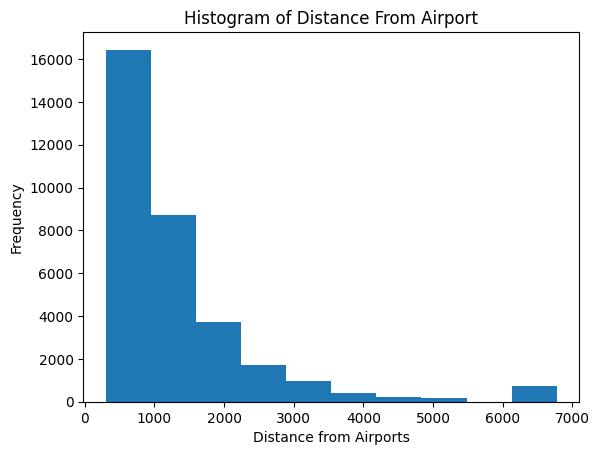

In [14]:
plt.hist(Ap_Fl.Distance)
plt.xlabel('Distance from Airports')
plt.ylabel('Frequency')
plt.title("Histogram of Distance From Airport")
plt.show()


<h3>Task 2: Lets check how the flight classes affect the ticket prices</h3>


<strong>Create dataframe to work</strong>

In [15]:
tickets_flights = pd.read_sql_query('SELECT * FROM ticket_flights', conn)
print(tickets_flights)

#Dataframe to check flight classes and their pricing
ticket_flights2 = pd.read_sql_query('SELECT fare_conditions, COUNT(*) AS Tickets_Sold, AVG(amount) Avg_Ticket_Price, SUM(amount) AS Revenue_Earned FROM ticket_flights GROUP BY fare_conditions', conn)

print(ticket_flights2)

             ticket_no  flight_id fare_conditions  amount
0        0005432159776      30625        Business   42100
1        0005435212351      30625        Business   42100
2        0005435212386      30625        Business   42100
3        0005435212381      30625        Business   42100
4        0005432211370      30625        Business   42100
...                ...        ...             ...     ...
1045721  0005435097522      32094         Economy    5200
1045722  0005435097521      32094         Economy    5200
1045723  0005435104384      32094         Economy    5200
1045724  0005435104352      32094         Economy    5200
1045725  0005435104389      32094         Economy    5200

[1045726 rows x 4 columns]
  fare_conditions  Tickets_Sold  Avg_Ticket_Price  Revenue_Earned
0        Business        107642      51143.416139      5505179600
1         Comfort         17291      32740.552889       566116900
2         Economy        920793      15959.813335     14695684400


Economy class brings the largest revenue even though it has the lowest average ticket price. This is because it sold almost 8x the tickets sold by Business and Comfort classes combined. Thus, sheer number of tickets sold is the main reason of revenue.

<strong>Check relationship between flight distances and ticket prices.</strong>

         flight_id FromAirportCode                   FromAirportName FromCity  \
0             1185             DME  Domodedovo International Airport   Moscow   
1             1185             DME  Domodedovo International Airport   Moscow   
2             3979             VKO     Vnukovo International Airport   Moscow   
3             3979             VKO     Vnukovo International Airport   Moscow   
4             3979             VKO     Vnukovo International Airport   Moscow   
...            ...             ...                               ...      ...   
1045721      33121             SKX                   Saransk Airport  Saransk   
1045722      33121             SKX                   Saransk Airport  Saransk   
1045723      33121             SKX                   Saransk Airport  Saransk   
1045724      33121             SKX                   Saransk Airport  Saransk   
1045725      33121             SKX                   Saransk Airport  Saransk   

                           

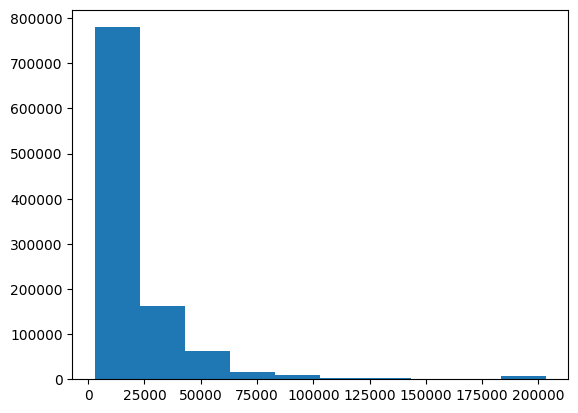

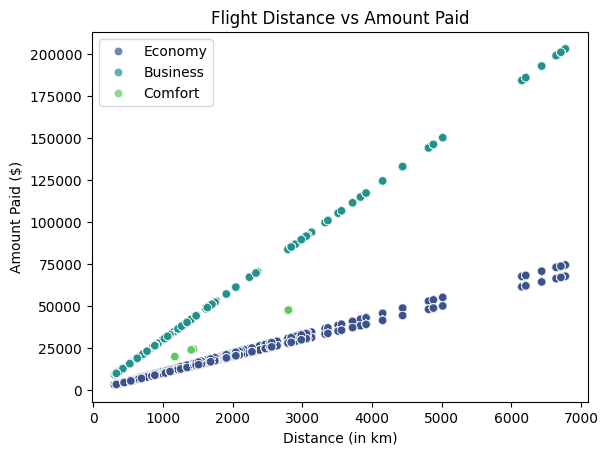

Spearman rank correlation coefficient: 0.911
P-value: 0.000
There is a statistically significant correlation.


In [16]:
#merging Airport data (AP_FL: for the distance) and the flight_tickets (tickets_flights: for the pricing).
AP_FL_Tickets = pd.merge(Ap_Fl, tickets_flights, left_on='flight_id', right_on='flight_id')
print(AP_FL_Tickets)

plt.hist(tickets_flights['amount'])
plt.show()

#Plot to check correlation between distance and ticket prices.
sns.scatterplot(x='Distance', y='amount', hue = 'fare_conditions', data = AP_FL_Tickets, palette='viridis', alpha=0.7)
plt.xlabel('Distance (in km)')
plt.ylabel('Amount Paid ($)')
plt.title('Flight Distance vs Amount Paid')
plt.legend()
plt.show()

# Calculate Spearman rank correlation coefficient and p-value since data is not normally distributed.
correlation, p_value = spearmanr(AP_FL_Tickets['Distance'], AP_FL_Tickets['amount'])

# Display the results
print(f"Spearman rank correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")

<strong>Which airports bring the most revenue?</strong>

In [19]:
AirportRevenue =    AP_FL_Tickets.groupby('FromCity').agg(Flights=('flight_id', 'count'), Revenue = ('amount', 'sum'), AvgFlightRevenue = ('amount', 'mean'), AvgFlightDistance = ('Distance', 'mean')).sort_values(by='Flights', ascending=False).reset_index()
print(AirportRevenue)

          FromCity  Flights     Revenue  AvgFlightRevenue  AvgFlightDistance
0           Moscow   360663  7462943300      20692.289755        1667.133201
1   St. Petersburg    64914  1469442200      22636.753243        1761.082606
2      Novosibirsk    46349  1274457100      27496.970808        2225.096661
3    Yekaterinburg    36108   514530000      14249.750748        1161.231087
4            Sochi    32159   546738000      17001.088342        1376.031043
..             ...      ...         ...               ...                ...
86     Cherepovets      187     4435800      23720.855615        1910.022182
87          Usinsk      176     2749100      15619.886364        1554.536873
88          Nyagan      111     1940100      17478.378378        1733.819304
89   Gorno-Altaysk       91     3481700      38260.439560        3131.652217
90      Strezhevoy       22      246400      11200.000000        1121.092244

[91 rows x 5 columns]


Largest cities airports bring the most revenues across all the airports. However, besides the big cities, we can observe that airports that offer longer routes (and thus higher fare prices) begin to generate more revenue despite having fewer outbound routes.

<strong>What airports attract the most non-economy class passengers?</strong>

In [40]:
NonEcoAP = AP_FL_Tickets.groupby('FromAirportName')['fare_conditions'].apply(lambda x: (x != 'Economy').sum()).sort_values(ascending=False).reset_index()
#Note: the sum() function, when used with a boolean condition, counts the True values, effectively giving you the count of elements that satisfy the condition we want.
print(NonEcoAP)

                       FromAirportName  fare_conditions
0   Sheremetyevo International Airport            21343
1     Domodedovo International Airport            18085
2                      Pulkovo Airport             9348
3        Vnukovo International Airport             7572
4                   Tolmachevo Airport             7473
..                                 ...              ...
89                   Khankala Air Base                0
90      Stavropol Shpakovskoye Airport                0
91                  Strezhevoy Airport                0
92                     Izhevsk Airport                0
93              Nizhnevartovsk Airport                0

[94 rows x 2 columns]
